# EDA 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
df = pd.read_csv('airbnb_listings.csv', low_memory=False)

# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
display(df.head(5))

,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [9]:
# Q2
df.isnull().sum()
df.isnull().sum() / len(df)*100
aaa = pd.DataFrame()
aaa['missing_num'] = df.isnull().sum()
aaa['missing_%'] = (df.isnull().sum()/len(df)*100)
aaa_a = aaa[aaa['missing_%']==0].index
aaa = aaa.drop(aaa_a)
aaa = aaa.sort_values('missing_%', ascending=False)
aaa

,missing_num,missing_%
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

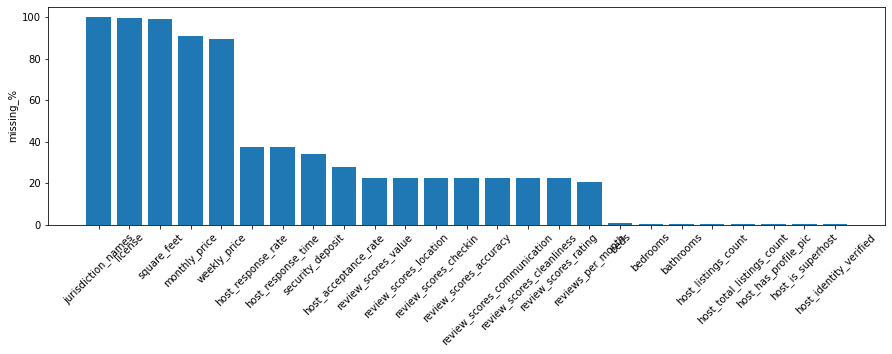

In [18]:
# Q3
plt.figure(figsize = (15,4))
label = aaa.index.values
plt.ylabel('missing_%')
plt.xticks(np.arange(len(label)), label)
plt.xticks(rotation=45)
plt.bar(np.arange(len(label)), aaa['missing_%'])
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [19]:
# Q4
df[df['beds'].isnull()].head(5)

,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [20]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [21]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        50796 non-null  int64  
 1   id                                50796 non-null  int64  
 2   host_is_superhost                 50791 non-null  object 
 3   host_listings_count               50791 non-null  float64
 4   host_total_listings_count         50791 non-null  float64
 5   host_verifications                50796 non-null  object 
 6   host_has_profile_pic              50791 non-null  object 
 7   host_identity_verified            50791 non-null  object 
 8   neighborhood                      50796 non-null  object 
 9   latitude                          50796 non-null  float64
 10  longitude                         50796 non-null  float64
 11  is_location_exact                 50796 non-null  object 
 12  prop

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<AxesSubplot:xlabel='room_type', ylabel='count'>

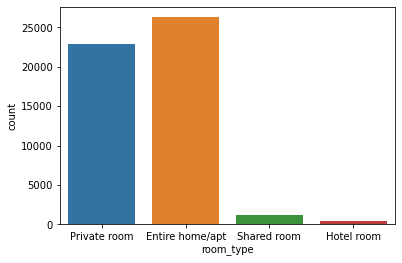

In [3]:
# Q5
sns.countplot(x = 'room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<BarContainer object of 4 artists>

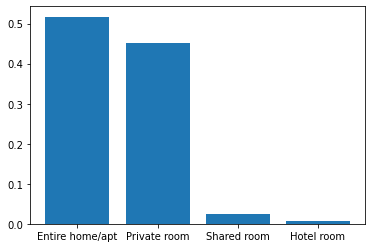

In [11]:
# Q6
qldbf = df.room_type.value_counts() / len(df)
plt.xlabel = ('room_type')
plt.ylabel = qldbf
plt.bar(qldbf.index, qldbf)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<AxesSubplot:xlabel='neighborhood', ylabel='count'>

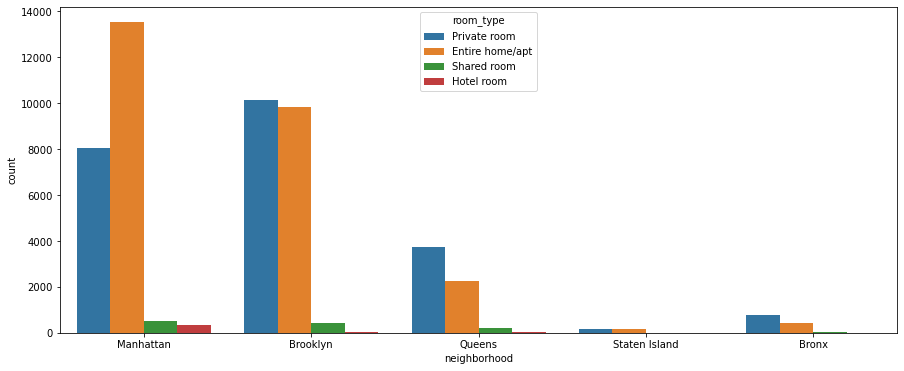

In [15]:
# Q7
plt.figure(figsize=(15,6))
sns.countplot(x = 'neighborhood', data = df, hue = 'room_type')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

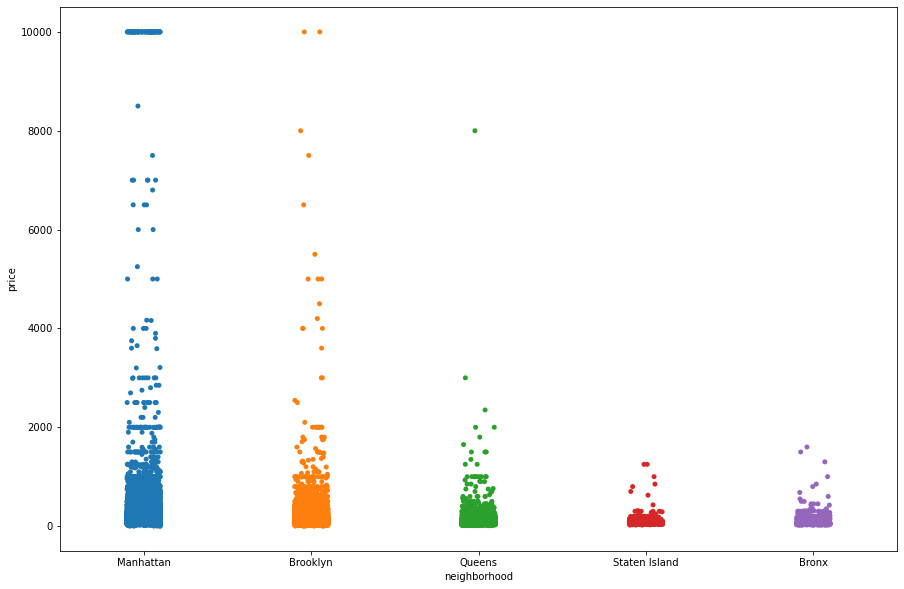

In [24]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(15,10))
sns.stripplot(x = 'neighborhood', y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [35]:
# Q9

방 종류 중 entire room의 비율이 가장 높은 것을 알 수 있었으나 지역에 따라 private room의 비율이 높은 지역도 있는 것을 알 수 있었다.
또한 방이 많은 지역일수록 가격이 높게 형성된 것도 알 수 있었는데,
이는 수요가 많은 지역에 방이 많이 공급되었고, 많은 수요에 따라 가격도 높아진 것으로 해석할 수 있다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

(array([3.651e+04, 9.804e+03, 2.987e+03, 8.590e+02, 3.000e+02, 1.280e+02,
        4.900e+01, 1.560e+02, 1.000e+00, 2.000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

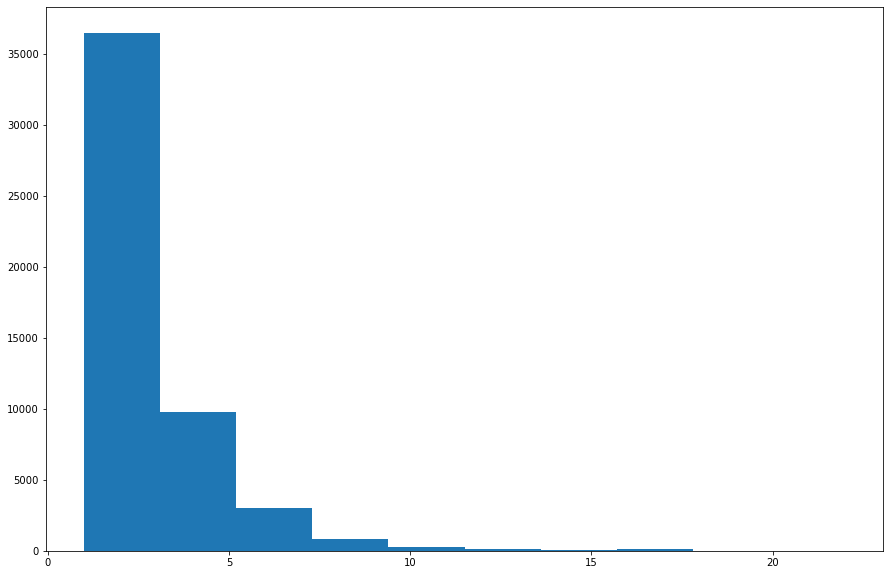

In [25]:
# Q10
plt.figure(figsize=(15,10))
plt.hist(df['accommodates'])

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(array([1.300e+01, 5.700e+01, 4.560e+02, 1.684e+03, 3.120e+03, 3.913e+03,
        3.807e+03, 3.584e+03, 3.065e+03, 3.169e+03, 2.952e+03, 1.744e+03,
        2.730e+03, 1.503e+03, 1.453e+03, 2.655e+03, 1.063e+03, 1.439e+03,
        1.041e+03, 1.224e+03, 1.614e+03, 4.210e+02, 8.310e+02, 3.000e+02,
        3.950e+02, 1.199e+03, 1.980e+02, 3.860e+02, 2.610e+02, 3.780e+02,
        6.750e+02, 8.700e+01, 2.090e+02, 9.000e+01, 1.100e+02, 4.100e+02,
        6.200e+01, 1.160e+02, 7.500e+01, 1.670e+02, 2.480e+02, 2.900e+01,
        7.600e+01, 2.900e+01, 2.800e+01, 1.770e+02, 2.000e+01, 3.500e+01,
        3.500e+01, 8.800e+01, 1.900e+02, 4.000e+00, 1.800e+01, 1.100e+01,
        1.400e+01, 7.600e+01, 1.000e+01, 1.200e+01, 1.300e+01, 5.300e+01,
        7.400e+01, 5.000e+00, 5.000e+00, 3.000e+00, 5.000e+00, 4.400e+01,
        2.000e+00, 1.100e+01, 7.000e+00, 2.600e+01, 3.800e+01, 0.000e+00,
        4.000e+00, 2.000e+00, 1.400e+01, 5.500e+01, 7.000e+00, 3.000e+00,
        5.000e+00, 2.600e+01, 6.200e+0

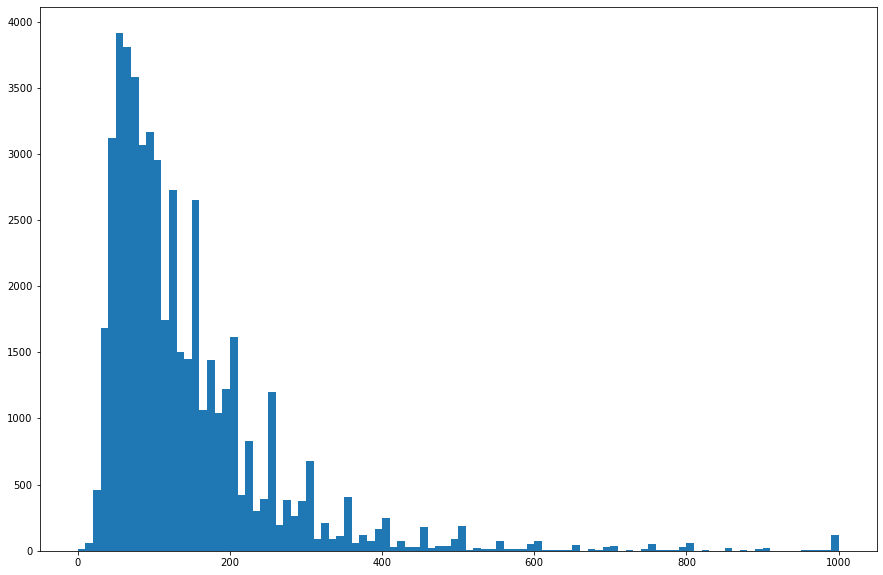

In [34]:
# Q11
plt.figure(figsize=(15,10))
plt.hist(df['price'],bins = 100, range=(0,1000))

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

시각화한 자료를 바탕으로 실제 특성들을 가공하는 방법에 대해서는 

<font color='orange'> 다음 시간인 FE 시간에 배우게 될 예정입니다.

다음 시간에 봐요!

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. </font>

* Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>

